### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?



1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis

%matplotlib inline

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
pd.set_option('display.max_rows', None)

In [11]:
file = 'amz_uk_price_prediction_dataset.csv'
df_amazon = pd.read_csv(file)

In [12]:
# Ver las columnas del DataFrame
df_amazon.head(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


In [ ]:
# Frequency table for 'category'
frequency_table = df_amazon['category'].value_counts()
pd.DataFrame(frequency_table)

In [14]:
#the top 5 most listed product categories 
top_categories = frequency_table.head(5)
top_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


C:\Users\anano\AppData\Local\Temp\ipykernel_20740\2762365806.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="Set3")


<Axes: xlabel='category'>

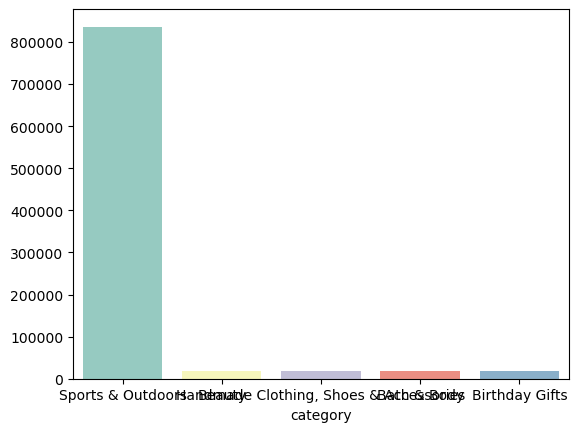

In [15]:
# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set3" palette
sns.barplot(x=top_categories.index, y=top_categories.values, palette="Set3")

<Axes: ylabel='count'>

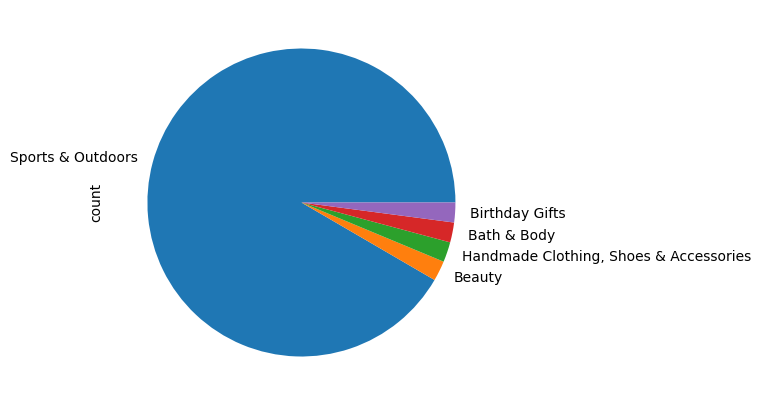

In [16]:
# pie chart
top_categories.plot.pie(figsize=(5, 5)) # dominates the sports and outdoor category


### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?



In [17]:
# Calculate mean, median, and mode for the price column
mean_price = df_amazon['price'].mean()
median_price = df_amazon['price'].median()
mode_price = df_amazon['price'].mode()[0]
mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

In [18]:
# Display the results
print(f"Mean price: {mean_price}")
print(f"Median price: {median_price}")
print(f"Mode price: {mode_price}")

# Comparison
print(f"\nThe average price point is {mean_price}, whereas the most common price point (mode) is {mode_price}.")

Mean price: 89.24380943923663
Median price: 19.09
Mode price: 9.99

The average price point is 89.24380943923663, whereas the most common price point (mode) is 9.99.


2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?


In [19]:
variance_price = df_amazon['price'].var()
std_dev_price = df_amazon['price'].std()
min_price = df_amazon['price'].min()
max_price = df_amazon['price'].max()
range_price = max_price - min_price
# Interquartile range (IQR)
q1 = df_amazon['price'].quantile(0.25)
q3 = df_amazon['price'].quantile(0.75)
iqr_price = q3 - q1

# Display the results
print(f"Variance: {variance_price}")
print(f"Standard Deviation: {std_dev_price}")
print(f"Range: {range_price}")
print(f"Interquartile Range (IQR): {iqr_price}")

Variance: 119445.48532256528
Standard Deviation: 345.60886175352226
Range: 100000.0
Interquartile Range (IQR): 36.0


In [20]:
'''The product prices exhibit **significant variation**, driven by the following factors:

- **High Variance (119,445.49)** and **Standard Deviation (345.61)**: 
These suggest that prices deviate widely from the average, indicating a broad spread.
- **Large Range (100,000)**: 
This shows a substantial gap between the lowest and highest prices, pointing to extreme price differences.
- **Moderate IQR (36)**: 
While the overall price spread is large, the middle 50% of prices are more tightly clustered, meaning most products
 fall within a relatively narrow price band.

### Conclusion:
The prices are highly varied, with a few outliers (likely high-priced products) significantly widening the overall spread, 
while the majority of prices are more consistent.'''

'The product prices exhibit **significant variation**, driven by the following factors:\n\n- **High Variance (119,445.49)** and **Standard Deviation (345.61)**: \nThese suggest that prices deviate widely from the average, indicating a broad spread.\n- **Large Range (100,000)**: \nThis shows a substantial gap between the lowest and highest prices, pointing to extreme price differences.\n- **Moderate IQR (36)**: \nWhile the overall price spread is large, the middle 50% of prices are more tightly clustered, meaning most products\n fall within a relatively narrow price band.\n\n### Conclusion:\nThe prices are highly varied, with a few outliers (likely high-priced products) significantly widening the overall spread, \nwhile the majority of prices are more consistent.'


3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 


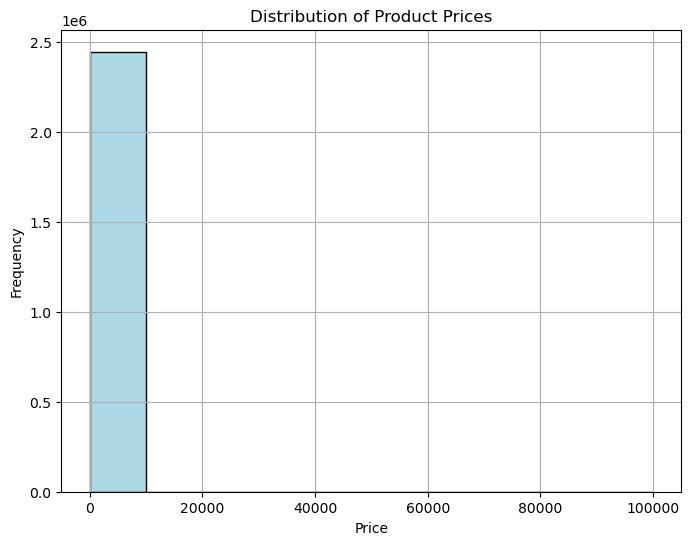

In [21]:
# plotting histogram
plt.figure(figsize=(8, 6))
plt.hist(df_amazon['price'], bins=10, color='lightblue', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [22]:
Q1 = df_amazon['price'].quantile(0.25)
Q3 = df_amazon['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = df_amazon[(df_amazon['price'] >= lower_bound) & (df_amazon['price'] <= upper_bound)]

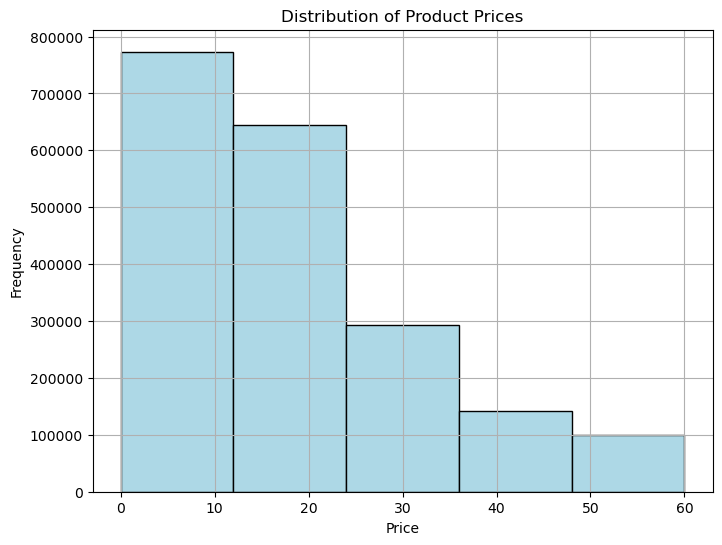

In [23]:
df_filtered = df_amazon[df_amazon['price'] < 60] 
# plotting histogram
plt.figure(figsize=(8, 6))
plt.hist(df_filtered['price'], bins=5, color='lightblue', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Axes: ylabel='price'>

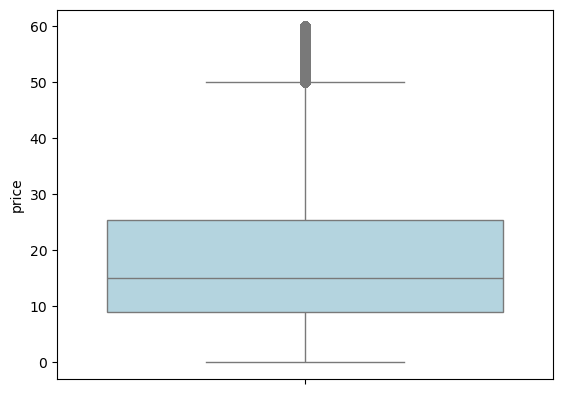

In [24]:
sns.boxplot(data = df_filtered['price'], color="lightblue")

In [25]:
#There are many outliers and extreme values in the dataset.

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?



In [28]:
# Check the first few rows of the 'reviews' column
df_amazon['stars'].head()

0    4.7
1    4.7
2    4.7
3    4.7
4    4.6
Name: stars, dtype: float64

In [29]:
# If the 'reviews' column has numerical ratings, calculate measures of centrality
mean_rating = df_amazon['stars'].mean()
median_rating = df_amazon['stars'].median()
mode_rating = df_amazon['stars'].mode()[0]

print(f"Mean rating: {mean_rating}")
print(f"Median rating: {median_rating}")
print(f"Mode rating: {mode_rating}")

Mean rating: 2.152836472966065
Median rating: 0.0
Mode rating: 0.0


In [ ]:
# there are not a trend in the ratings

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?



In [30]:
# Calculate variance
variance_stars = df_amazon['stars'].var()

# Calculate standard deviation
std_dev_stars = df_amazon['stars'].std()

# Calculate IQR
Q1 = df_amazon['stars'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df_amazon['stars'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1

# Display results
print(f"Variance of stars: {variance_stars}")
print(f"Standard Deviation of stars: {std_dev_stars}")
print(f"Interquartile Range (IQR) of stars: {IQR}")

Variance of stars: 4.81743402976196
Standard Deviation of stars: 2.1948653785054697
Interquartile Range (IQR) of stars: 4.4


In [35]:
''' Conclusion
The combination of high variance, considerable standard deviation, and a significant interquartile range (IQR) suggests that customer ratings are not consistent. Instead, there is wide variation in feedback, indicating diverse customer experiences with the products.

This information can be useful for understanding customer sentiment and making improvements in product quality or customer service.'''

' Conclusion\nThe combination of high variance, considerable standard deviation, and a significant interquartile range (IQR) suggests that customer ratings are not consistent. Instead, there is wide variation in feedback, indicating diverse customer experiences with the products.\n\nThis information can be useful for understanding customer sentiment and making improvements in product quality or customer service.'

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?



In [32]:

# Calculate skewness
skewness = skew(df_amazon['stars'])

# Calculate kurtosis
kurt = kurtosis(df_amazon['stars'])

# Display results
print(f"Skewness of stars: {skewness}")
print(f"Kurtosis of stars: {kurt}")


Skewness of stars: 0.08120730776283354
Kurtosis of stars: -1.926004642549839


### Summary

- **Skewness**: **0.081** - Indicates a nearly symmetrical distribution, with no significant lean towards higher or lower ratings.
  
- **Kurtosis**: **-1.926** - Suggests a platykurtic distribution, meaning fewer extreme ratings and a flatter peak.

### Conclusion
The ratings are approximately normally distributed, showing moderate responses with less variability in extreme ratings.

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common? 

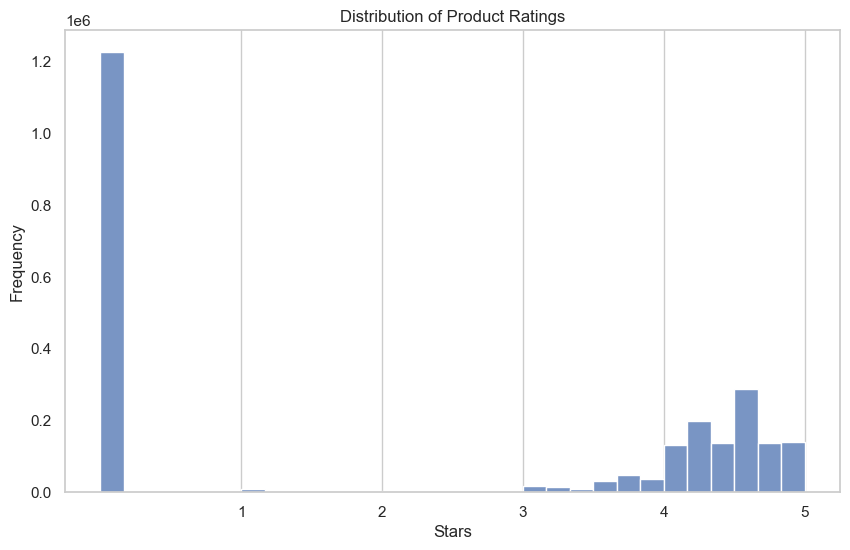

In [33]:
# Set the style of seaborn
sns.set_theme(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_amazon['stars'], bins=30, kde=False)  # You can adjust the number of bins
plt.title('Distribution of Product Ratings')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))  # Assuming a 1-5 star rating system
plt.grid(axis='y')
plt.show()


### Summary of Histogram:
- **Most Common Rating**: **1 star** has the highest frequency.
- **Sparse Middle Ratings**: Few products rated **2 or 3 stars**.
- **Positive Ratings**: Increased frequency for **4 and 5 stars**.

Overall, ratings tend to cluster at the extremes, with many low and high ratings but fewer in the middle.